In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/Data/cleaned_data.csv")
df.head()

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,140.0,125.0,9.0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,188.0,133.0,9.0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,105.0,139.0,9.0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,34.0,137.0,9.0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,39.0,111.0,9.0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


# Data Visualizations for Feature Importance

### Correlation Matrix Represented with Heatmap

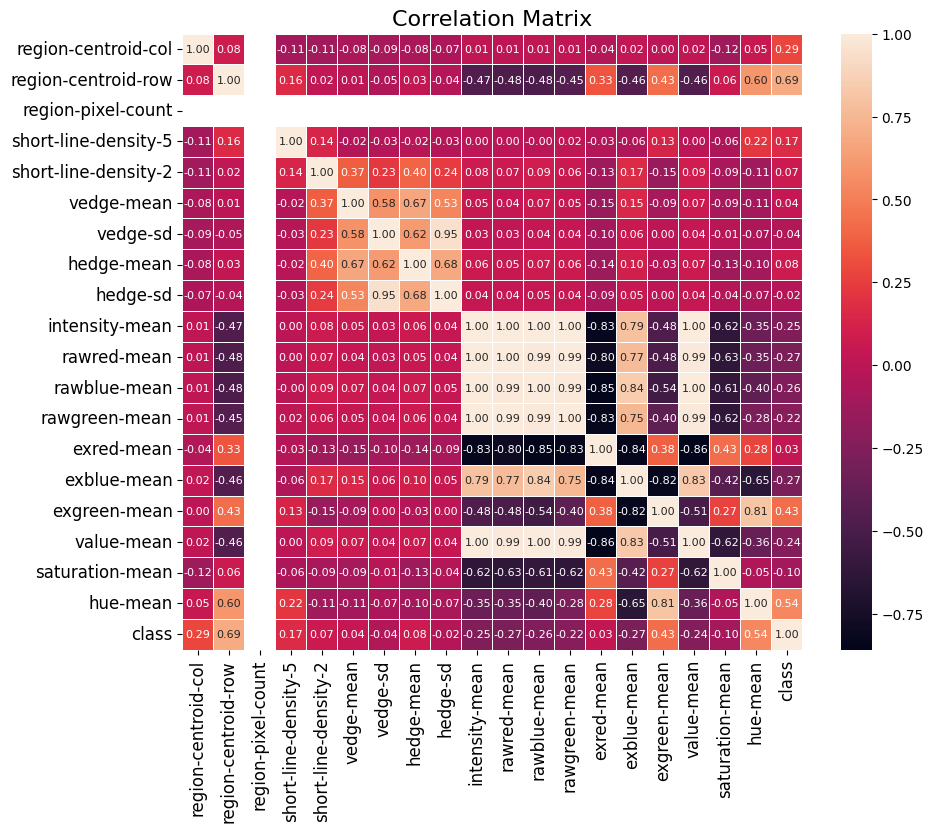

In [ ]:
corr = df.corr()

# Heatmap for Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Bar Plot to represent Correlation

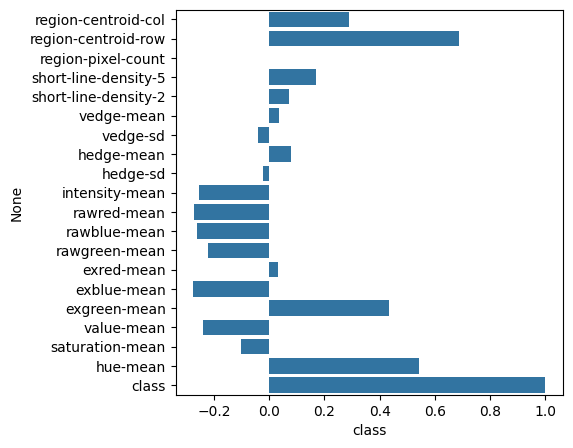

In [ ]:
# bar plot for correlation

plt.figure(figsize=(5, 5))
sns.barplot(x = df.corr()['class'], y=df.corr()['class'].index)
plt.show()

### From our graphical interpretations, we see that there are multiple features that have higher importance and correlation to our output feature 'class' Some of these features include 'hue-mean', 'region-centroid-row', and 'exgreen-mean'. We claimed in our proposal that we assume the features with the highest importance could be be the features that deal with representation of color, and that seems to be true.

# We will use SelectKBest to perform Feature Selection
### SelectKBest is a filter-based feature selection method, and we choose this method because SelectKBest can act independent of any Machine Learning Algorithm.

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# We will use an arbitrary value of k = 12, to keep the best 12 features. This can be changed in the future if performance is low
y = df['class']
X = df.drop(['class'], axis=1)

# Get names of features
feature_names = X.columns.tolist()

# Initialize selector
selector = SelectKBest(score_func=f_classif, k=12)  # Select top 12 features

# Fit the selector to the data
X_new_kbest = selector.fit_transform(X, y)

# Get a mask of the selected features
selected_mask = selector.get_support()

# Filter feature names using the selected mask
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_mask) if selected]

print("Selected features:")
print(selected_feature_names)

Selected features:
['region-centroid-col', 'region-centroid-row', 'intensity-mean', 'rawred-mean', 'rawblue-mean', 'rawgreen-mean', 'exred-mean', 'exblue-mean', 'exgreen-mean', 'value-mean', 'saturation-mean', 'hue-mean']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### We see from the SelectKBest (k=12) we are able to say the top 12 features that help us predict our class is ['region-centroid-col', 'region-centroid-row', 'intensity-mean', 'rawred-mean', 'rawblue-mean', 'rawgreen-mean', 'exred-mean', 'exblue-mean', 'exgreen-mean', 'value-mean', 'saturation-mean', 'hue-mean']

# Create new dataframe from selected features and export as CSV

In [ ]:
# Initialize new X dataframe

X_df = pd.DataFrame(X_new_kbest, columns = selected_feature_names)
X_df.head()

,region-centroid-col,region-centroid-row,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,140.0,125.0,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
# new dataframe
new_df = pd.concat([X_df, y], axis=1)
new_df.head()

,region-centroid-col,region-centroid-row,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,140.0,125.0,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,1
1,188.0,133.0,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,1
2,105.0,139.0,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,1
3,34.0,137.0,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,1
4,39.0,111.0,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,1


In [ ]:
new_df.shape

(210, 13)

In [ ]:
# Save data into csv file
new_df.to_csv('/content/drive/MyDrive/Colab Notebooks/AIForEngineersProject/Data/cleaned_data_feature_selection.csv')

# Random Forest Algorithm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [ ]:
# Load the dataset
file_path = r'C:\Users\fma22\OneDrive\Desktop\AI for Engineers\project\cleaned_data_feature_selection.csv'
df = pd.read_csv(file_path)


In [ ]:
# Prepare the data
X = df.drop(['class', 'Unnamed: 0'], axis=1)  # Adjust based on your dataset's column names
y = df['class']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train_encoded)


RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_rf)

In [ ]:
print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(conf_matrix_rf)

Accuracy: 0.8809523809523809
Confusion Matrix:
[[5 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 7 0 0 0 0]
 [0 0 0 3 1 2 0]
 [0 0 1 1 4 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 8]]


# K-Means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = r'C:\Users\fma22\OneDrive\Desktop\AI for Engineers\project\cleaned_data_feature_selection.csv'
df = pd.read_csv(file_path)
X = df.drop(['class', 'Unnamed: 0'], axis=1)  # Adjust based on your dataset's column names

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

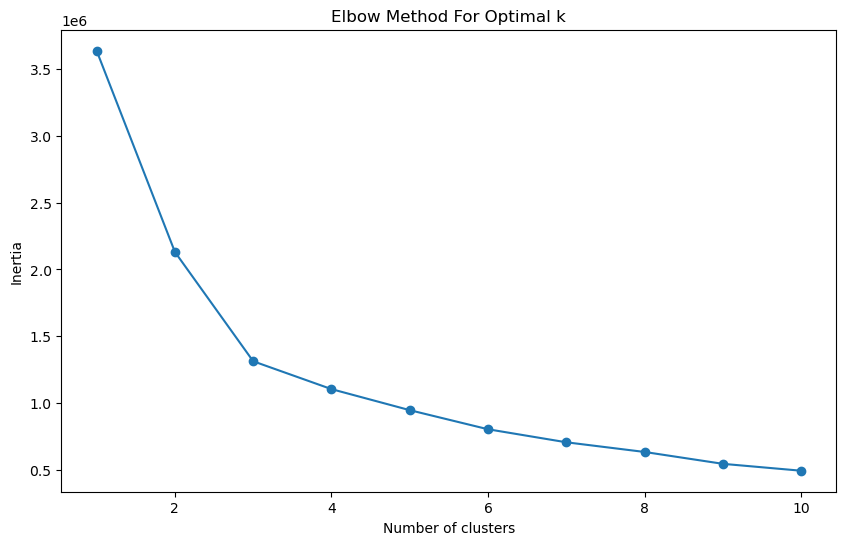

In [ ]:
# Plotting the elbow method result
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Assuming the optimal number of clusters from the elbow method is 3 (adjust based on your observation)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


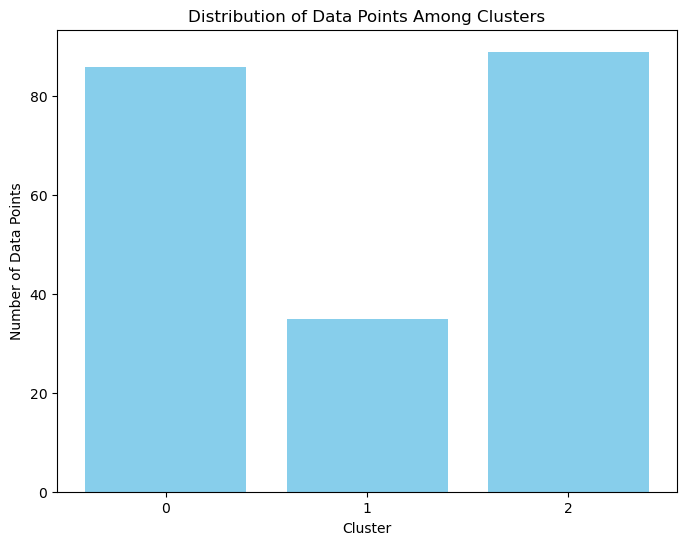

In [ ]:
# Visualize the distribution of data points among the clusters
plt.figure(figsize=(8, 6))
plt.hist(clusters, bins=range(4), align='left', rwidth=0.8, color='skyblue')
plt.title('Distribution of Data Points Among Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(range(3))
plt.show()


In [ ]:
# Analyzing the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 57.87209302 139.3372093   18.6851852   16.10206707  23.28811389
   16.66537481  -7.749354    13.80878553  -6.05943139  24.47028438
    0.51365474  -1.11500052]
 [112.42857143  47.71428571 111.20846531 100.68888977 126.95555714
  105.9809518  -31.55872994  47.24127011 -15.68253973 126.95555714
    0.21646492  -2.29913578]
 [193.97752809 136.24719101  25.72908863  22.63295896  31.41697902
   23.1373284   -9.28838947  17.06367034  -7.7752809   32.34456951
    0.41716591  -1.18116451]]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Assuming X is your features and y_encoded is your encoded labels
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
clusters = kmeans.labels_

# Mapping clusters to labels
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(y_encoded[mask])[0]

# Calculating "pseudo-accuracy"
pseudo_accuracy = accuracy_score(y_encoded, labels)
print(f'Pseudo-Accuracy of K-means: {pseudo_accuracy}')


C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\fma22\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pseudo-Accuracy of K-means: 0.3619047619047619


# The accuracy of K-means clustering is lower than that of the Random Forest classifier due to their fundamental differences in learning approaches. However, employing XGBoost has the potential to surpass Random Forest in terms of accuracy.

# XGBoost Algorithm


In [ ]:
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
image_segmentation = fetch_ucirepo(id=50)

# data (as pandas dataframes)
X = image_segmentation.data.features
y = image_segmentation.data.targets

# metadata
print(image_segmentation.metadata)

# variable information
print(image_segmentation.variables)

{'uci_id': 50, 'name': 'Image Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/50/image+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/50/data.csv', 'abstract': 'Image data described by high-level numeric-valued attributes, 7 classes', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 2310, 'num_features': 19, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5GP4N', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The instances were drawn randomly from a database of 7 outdoor images.  The images were handsegmented to create a classification for every pixel.  \r\n\r\n   Each instance is a 3x3 region.', 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_dat

In [ ]:
X

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [ ]:
y

,class
0,BRICKFACE
1,BRICKFACE
2,BRICKFACE
3,BRICKFACE
4,BRICKFACE
...,...
205,GRASS
206,GRASS
207,GRASS
208,GRASS


In [ ]:
import pandas as pd

# replacing values
y['class'].replace(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
                        [0, 1, 2, 3, 4, 5 , 6], inplace=True)

<ipython-input-5-d932cd6eb8a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'].replace(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],


In [ ]:
df = pd.concat([X, y], axis=1)
df

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311,3
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684,3
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800,3
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487,3


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
198,29.0,195.0,9,0.000000,0.000000,0.444444,0.403687,0.611111,0.680414,16.037037,14.444445,13.333333,20.333334,-4.777778,-8.111111,12.888889,20.333334,0.342307,1.943040
56,67.0,71.0,9,0.000000,0.000000,1.666667,0.888891,1.499999,0.299998,125.962960,115.555560,140.888890,121.444440,-31.222221,44.777780,-13.555555,140.888890,0.179672,-2.339758
180,204.0,156.0,9,0.000000,0.000000,0.500000,0.278886,2.000000,0.557773,23.703703,17.333334,25.444445,28.333334,-19.111110,5.222222,13.888889,28.333334,0.389034,2.864931
55,80.0,40.0,9,0.000000,0.000000,0.611111,0.574132,0.722223,0.772203,110.703705,96.222220,129.000000,106.888885,-43.444443,54.888890,-11.444445,129.000000,0.254051,-2.434692
208,208.0,240.0,9,0.111111,0.000000,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,233.0,184.0,9,0.000000,0.000000,0.500000,0.077778,0.777778,0.785185,11.851851,9.777778,9.888889,15.888889,-6.222222,-5.888889,12.111111,15.888889,0.405556,2.128646
137,223.0,62.0,9,0.000000,0.000000,0.333333,0.298142,0.444444,0.501848,6.444445,4.111111,11.444445,3.777778,-7.000000,15.000000,-8.000000,11.444445,0.670370,-2.048717
72,41.0,75.0,9,0.000000,0.111111,15.388889,19.136257,26.611113,31.713590,55.000000,47.444443,65.444440,52.111110,-22.666666,31.333334,-8.666667,65.444440,0.297802,-2.356754
140,58.0,113.0,9,0.000000,0.000000,3.444445,1.223232,0.722222,0.389682,20.851852,16.888890,28.444445,17.222223,-11.888889,22.777779,-10.888889,28.444445,0.414807,-2.125693


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
import math

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=math.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=16,
              num_parallel_tree=1, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([5, 3, 5, 3, 5, 2, 5, 4, 3, 4, 1, 0, 5, 0, 5, 4, 4, 2, 5, 5, 5, 5,
       1, 4, 5, 4, 0, 6, 0, 2, 6, 6, 0, 0, 0, 1, 4, 2, 0, 4, 2, 3, 1, 4,
       1, 6, 3, 3, 1, 3, 6, 3, 6, 0, 2, 0, 4, 3, 0, 3, 1, 5, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9206349206349206

In [ ]:
precision = precision_score(y_test, y_pred, average = 'macro')
precision

0.9025974025974026

In [ ]:
Confusion_Matrix = confusion_matrix(y_test, y_pred)
Confusion_Matrix

array([[ 9,  0,  0,  0,  0,  0,  0],
       [ 1,  8,  0,  0,  0,  0,  2],
       [ 0,  0,  6,  0,  0,  0,  1],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0,  0, 12,  0],
       [ 1,  0,  0,  0,  0,  0,  3]])

# Hyperparameter Tuning for XGBoost


In [ ]:
X

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vedge-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [ ]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
205,3
206,3
207,3
208,3


In [ ]:
import xgboost as XGB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd

# replacing values
y['class'].replace(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
                        [0, 1, 2, 3, 4, 5 , 6], inplace=True)

<ipython-input-33-d932cd6eb8a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'].replace(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
XGB_model = XGB.XGBClassifier(objective = 'binary:logistic', n_estimators = 100)

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]}

In [ ]:
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_

In [ ]:
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = best_xgb.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8571428571428571


In [ ]:
test_accuracy = accuracy_score(y_temp, best_xgb.predict(X_temp))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7857142857142857
